In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization,MaxPooling2D,Flatten,Dropout,Conv2D,Input,Dense,GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000,)


In [4]:
#the number of classes
x_train[0]
k=len(set(y_train))
print(k)

10


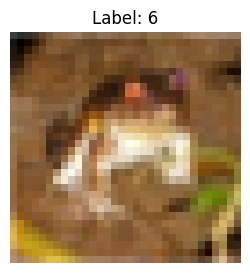

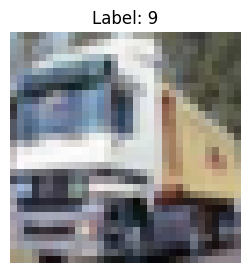

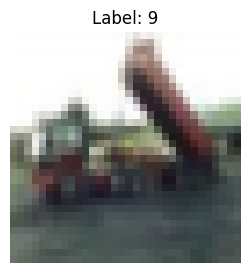

In [5]:
import matplotlib.pyplot as plt

# Display the first three images from x_train
for i in range(3):
    plt.figure(figsize=(3, 3))
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    plt.show()

In [6]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(i)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12)

Epoch 1/12
1563/1563 [==============================] - 18s 8ms/step - loss: 1.5236 - accuracy: 0.4568 - val_loss: 1.2566 - val_accuracy: 0.5544
Epoch 2/12
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2101 - accuracy: 0.5702 - val_loss: 1.1536 - val_accuracy: 0.5893
Epoch 3/12
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0562 - accuracy: 0.6280 - val_loss: 1.1214 - val_accuracy: 0.6078
Epoch 4/12
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9083 - accuracy: 0.6804 - val_loss: 1.1093 - val_accuracy: 0.6153
Epoch 5/12
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7754 - accuracy: 0.7269 - val_loss: 1.1332 - val_accuracy: 0.6150
Epoch 6/12
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6455 - accuracy: 0.7710 - val_loss: 1.1552 - val_accuracy: 0.6256
Epoch 7/12
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5351 - accuracy: 0.8122 - val_loss: 1.2142 - val_a

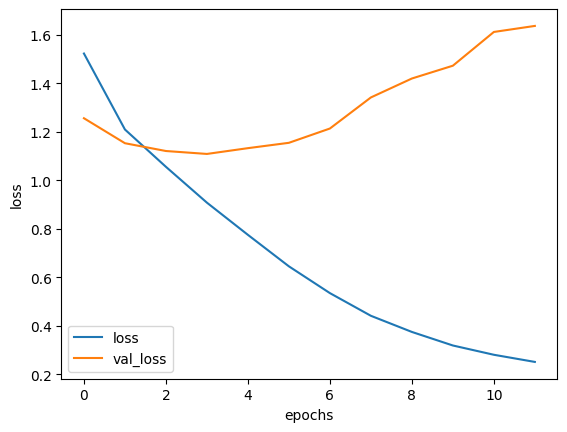

In [8]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc=0)

1/1 [==============================] - 0s 187ms/step


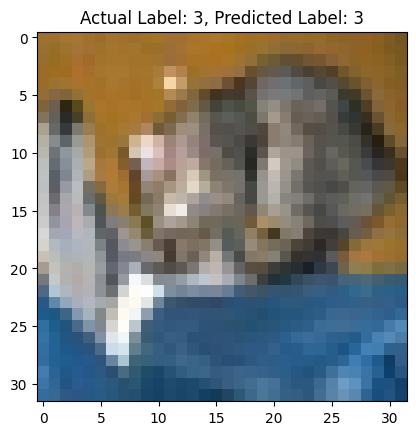

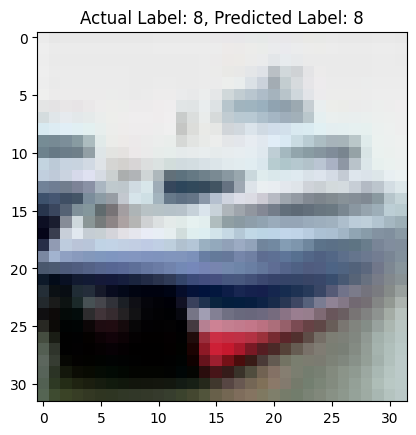

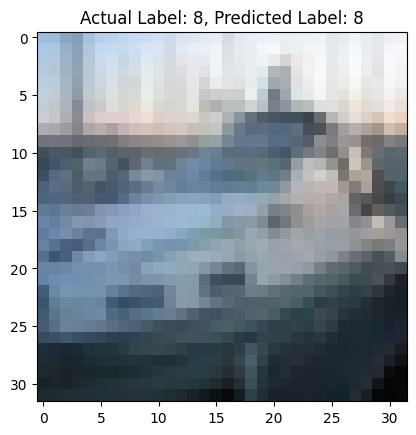

In [9]:
# Make predictions for the first three images
predictions = model.predict(x_test[:3])

# Convert predictions to class labels (index with the maximum probability)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(3):
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual Label: {y_test[i]}, Predicted Label: {predicted_labels[i]}")
    plt.show()


313/313 [==============================] - 1s 2ms/step
confusion matrix without normalization
cm


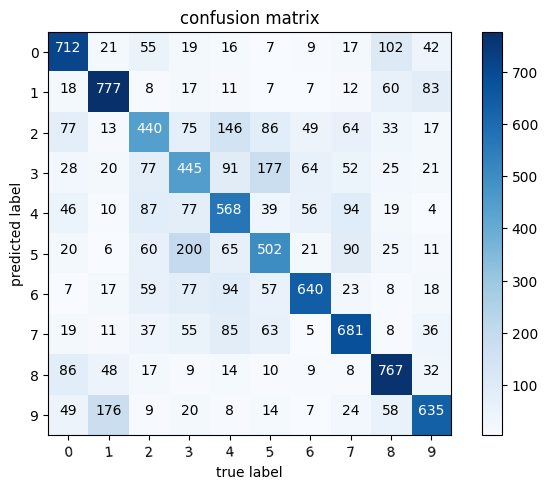

In [10]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalise=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
  ''' this function prints and plots the confusion matrix
  normalization can be applied by setting normalize=True
  '''
  if normalise:
      cm=cm.astype('float')/cm.sum(axis=1)[:,np.new_axis]
      print("normalize confusion matrix")
  else:
        print("confusion matrix without normalization")
        print("cm")
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=5)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalise else "d"
  thresh=cm.max()/2
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white'if cm[i,j] >thresh else "black" )
  plt.tight_layout()
  plt.xlabel("true label")
  plt.ylabel('predicted label')
  plt.show()



p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [10]:
#drive link:https://drive.google.com/drive/folders/103dSV4O1hJueqbFS_28YQQdZTlLvuYXs